# Import Library

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
!pip install yfinance

# Market and Problem Context

Tesla (TSLA) and Bank Central Asia (BBCA) have faced multiple risk events over the past five years:

1. Tesla Q2 2025 deliveries drop ~14% YoY

Tesla reported a 14% year-over-year decline in Q2 2025 deliveries (384,122 vs. 443,956 last year), sparking concern over weakening demand amid growing EV competition and public criticism of Elon Musk. Source: (https://www.theverge.com/news/696473/tesla-q2-2025-sales-report-decrease-elon-musk-robotaxi).

2. Cybertruck sold only around 5,000 units

Cybertruck deliveries totaled just around 5,000 units in Q2 2025, far below Tesla’s ambitious targets and indicating poor consumer uptake. In comparison with the other brand, Ford sold more F-150 Lightnings with 5,842 units despite sales dropping 26% year-over-year. Source: (https://electrek.co/2025/07/02/tesla-confirms-cybertruck-sales-are-down-to-just-5000-units/).

3. Major recalls impact investor confidence

U.S. regulators initiated a recall for nearly all Cybertrucks (≈46,000 units) due to windshield panel defects. This is Tesla’s eighth recall in approximately 15 months, adding to reputational and operational risk. Source: (https://apnews.com/article/cybertruck-recall-tesla-elon-musk-nhtsa-8c517e21aa1119d74b9db39f6aca01b7).

4. Tesla's stock down

Tesla stock is still down around 47% from its peak in December 2024, and the possibility of further downside remains on the table. Historically, Tesla has underperformed the broader market during downturns. For example, during the 2022 inflation-driven sell-off, the company lost 73.6% of its value, while the S&P 500 dropped by just 25.4%. This pattern raises concerns that another broad correction could hit Tesla even harder than other large-cap stocks. In the first quarter of 2025, Tesla reported 336,681 vehicle deliveries, representing a 13% decline year-over-year. Source: (https://www.nasdaq.com/articles/teslas-stock-down-50-and-there-still-more-trouble-ahead).

5. Foreign investor outflows and market reaction

In late January 2025, BBCA’s stock dropped by around 5.6% within a week. This decline was mainly driven by aggressive foreign outflows, notably involving major institutional investors like BlackRock. The sell-off raised concerns about BBCA’s high valuation, especially after its strong rally in the previous quarters. Source: (https://www.cnbcindonesia.com/research/20250128102644-128-606277/blackrock-bikin-saham-bca-anjlok-5-seminggu-saatnya-buy-or-bye).

6. Slower earnings growth and operational concerns

BBCA’s financial performance in 2023 showed signs of moderation. The company reported a net profit of IDR 48.65 trillion, growing 19.4% year-over-year—lower than the 26.6% growth achieved in 2022. This deceleration was partially due to a 15.5% increase in operating expenses, which squeezed margins and reflected rising cost pressure. The slowdown in profit growth came as a surprise to some investors, given BBCA’s reputation for consistent and resilient earnings. Source: (https://www.idnfinancials.com/news/48989/bcas-profit-growth-in-2023-slowed-down-compared-to-2022).


# Scraping Data

In [9]:
import yfinance as yf
import pandas as pd

tickers = ['TSLA', 'BBCA.JK', '^GSPC', '^JKSE']

data = yf.download(tickers, start='2020-07-01', end='2025-07-01')

close = data.xs('Close', axis=1, level=0)

print(close.head())



/tmp/ipython-input-9-2731882905.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-07-01', end='2025-07-01')
[*********************100%***********************]  4 of 4 completed


Ticker          BBCA.JK       TSLA        ^GSPC        ^JKSE
Date                                                        
2020-07-01  5133.783691  74.641998  3115.860107  4914.388184
2020-07-02  5195.743652  80.577332  3130.010010  4966.779785
2020-07-03  5195.743652        NaN          NaN  4973.793945
2020-07-06  5253.277832  91.438667  3179.719971  4988.866211
2020-07-07  5301.959961  92.657333  3145.320068  4987.082031


We retrieved daily stock price data using the `yfinance` API for the following tickers:

- `TSLA` (Tesla Inc.)
- `BBCA.JK` (Bank Central Asia, traded on IDX)
- `^GSPC` (S&P 500 index, benchmark for TSLA)
- `^JKSE` (Jakarta Composite Index, benchmark for BBCA)

We focus on the **adjusted closing price**, which accounts for corporate actions like splits and dividends. Since `yfinance.download()` now defaults to `auto_adjust=True`, we directly extract the `'Close'` prices.

# Business Understanding

The primary goal of this analysis is to evaluate the daily financial risk exposure and understand the nature of risk whether it's driven by market-wide factors (systematic) or asset-specific events (unsystematic) in two different high-profile stocks: Tesla (TSLA) and Bank Central Asia (BBCA). By applying a combination of financial risk metrics and asset pricing models, we aim to uncover how much risk these assets carry, and whether that risk is justified by their historical returns.

To approach this, we use three core methodologies:

1. Historical and Parametric Value at Risk (VaR)

VaR gives us an estimate of potential daily losses under normal market conditions, capturing how exposed each stock is to sudden negative swings.

2. Capital Asset Pricing Model (CAPM)

CAPM helps us separate market-related risk from company-specific movement by comparing each stock’s returns against its broader index benchmark.

3. Sharpe Ratio.

Sharpe Ratio offers a way to quantify whether the excess returns investors are getting are truly worth the risk they’re taking.

The decision to analyze TSLA and BBCA was intentional, as both stocks recently faced significant real-world pressure. Tesla saw a sharp valuation drop of nearly 50% amid declining deliveries and persistently high price multiples, while BBCA experienced a notable foreign investor sell-off and slowing profit growth. This combination allows us to compare risk dynamics between a U.S.-based high-volatility tech stock and a Southeast Asian banking giant under macro and institutional stress. Analyzing these two assets side-by-side highlights how market sentiment, geography, and sector differences affect return-risk profiles in distinct ways.

# Preprocessing Data

In [10]:
print(close.isna().sum())


Ticker
BBCA.JK    94
TSLA       38
^GSPC      38
^JKSE      94
dtype: int64


We encountered 94 missing values for both BBCA and JKSE and 38 for both TSLA and GSPC. We decided to remove them using dropna().

In [11]:
close = close.dropna()
print(close.shape)


(1161, 4)


After dropping the missing values, we're left with 1,161 observations in the dataset.

In [12]:
close

Ticker,BBCA.JK,TSLA,^GSPC,^JKSE
Date,,,,
2020-07-01,5133.783691,74.641998,3115.860107,4914.388184
2020-07-02,5195.743652,80.577332,3130.010010,4966.779785
2020-07-06,5253.277832,91.438667,3179.719971,4988.866211
2020-07-07,5301.959961,92.657333,3145.320068,4987.082031
2020-07-08,5487.837402,91.058670,3169.939941,5076.173828
...,...,...,...,...
2025-06-23,8625.000000,348.679993,6025.169922,6787.140137
2025-06-24,8775.000000,340.470001,6092.180176,6869.170898
2025-06-25,8600.000000,327.549988,6092.160156,6832.143066


# Clean Dataset Visualization

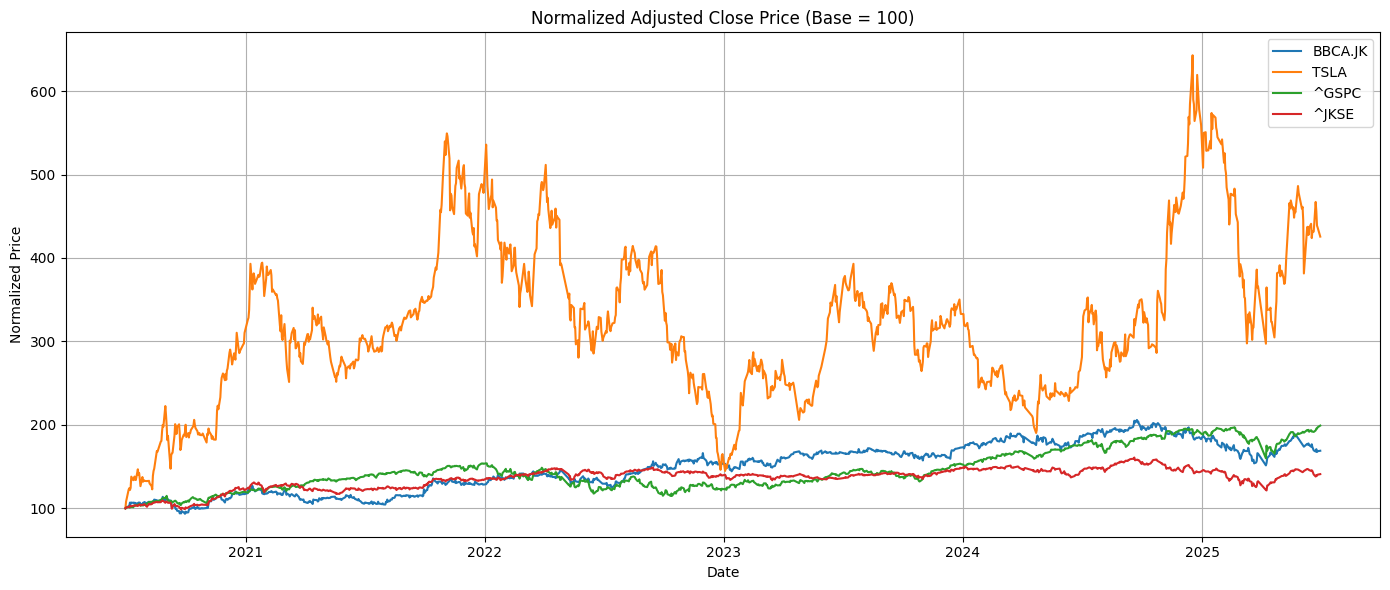

In [13]:
# Normalize all stock prices
normalized_close = close / close.iloc[0] * 100

plt.figure(figsize=(14, 6))
for ticker in normalized_close.columns:
    plt.plot(normalized_close[ticker], label=ticker)

plt.title('Normalized Adjusted Close Price (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Normalized Price Comparison

To compare relative performance over time, we normalize all adjusted close prices to start at 100. This removes the distortion caused by differing currencies and price scales.

The formula used is:

$$
[
\text{Normalized Price} = \frac{\text{Current Price}}{\text{Price on First Day}} \times 100
]
$$

From the chart, it's clear that **TSLA** exhibits extreme volatility, peaking more than 600% from the base before declining again. In contrast, **BBCA**, **S&P 500**, and **IHSG** show more stable trends, with BBCA steadily growing over the period. This visualization allows for an apples-to-apples comparison of performance, independent of absolute price.


📊 Descriptive Statistics:
             Mean   Std Dev  Skewness   Kurtosis
Ticker                                          
BBCA.JK  0.000452  0.014817 -0.022416   2.504249
TSLA     0.001249  0.042510 -0.033604   3.320417
^GSPC    0.000594  0.011849 -1.176437  18.301048
^JKSE    0.000296  0.009475 -0.732897   7.384575


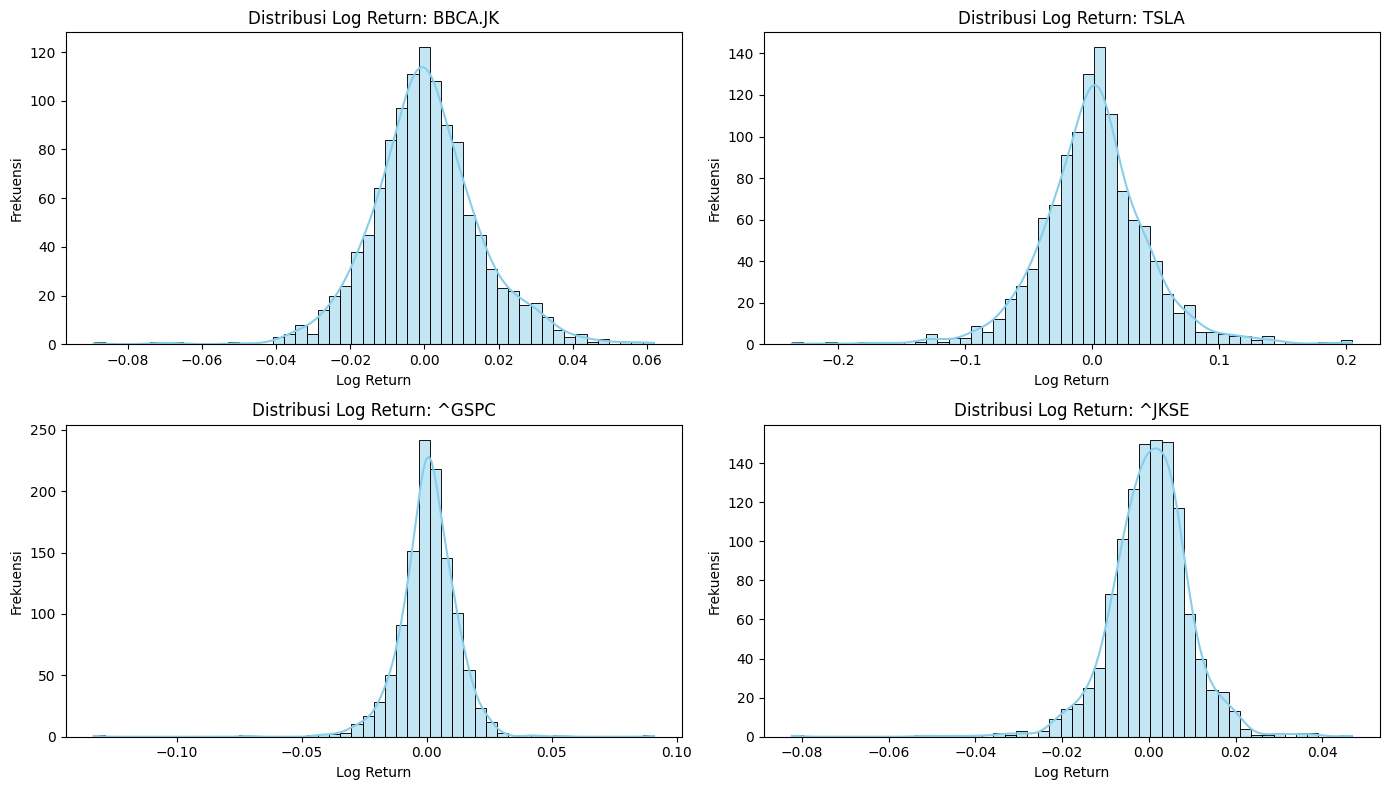

/tmp/ipython-input-14-1358839332.py:43: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


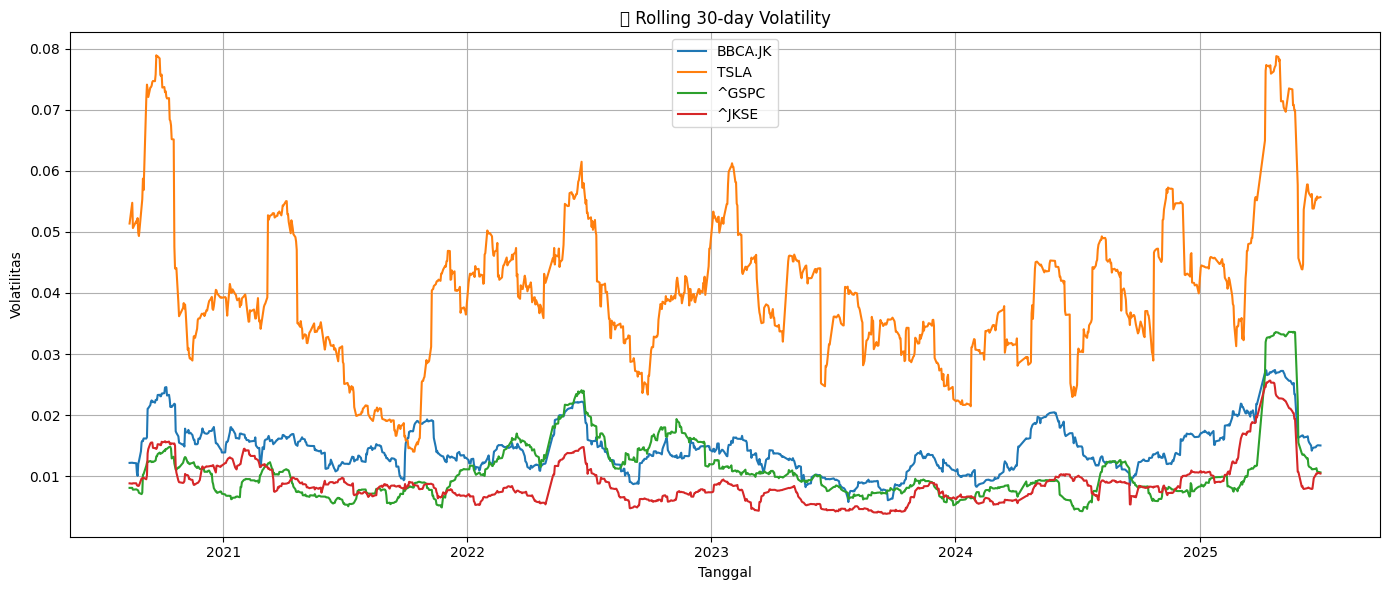

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate daily log return
log_returns = np.log(close / close.shift(1)).dropna()

# Descriptive Statistic
stats_df = pd.DataFrame(index=log_returns.columns)
stats_df['Mean'] = log_returns.mean()
stats_df['Std Dev'] = log_returns.std()
stats_df['Skewness'] = log_returns.skew()
stats_df['Kurtosis'] = log_returns.kurtosis()

print("📊 Descriptive Statistics:")
print(stats_df)

# Visualizing Log Return Distribution
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(log_returns.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(log_returns[ticker], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribusi Log Return: {ticker}')
    plt.xlabel('Log Return')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Rolling Volatility (30 day standart deviation)
rolling_vol = log_returns.rolling(window=30).std()

plt.figure(figsize=(14, 6))
for ticker in log_returns.columns:
    plt.plot(rolling_vol[ticker], label=ticker)
plt.title('Rolling 30-day Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Log Return Distribution – Preliminary Insights

The daily return distributions for BBCA, TSLA, S&P 500, and IHSG highlight distinct risk and volatility profiles:

1. TSLA clearly exhibits the most volatile behavior. Its distribution is wide with pronounced fat tails, particularly on the downside. This aligns with TSLA’s nature as a high-growth, high-risk asset—frequent large swings, both positive and negative.

2. BBCA and IHSG display more symmetric and tighter distributions. While downside risk is still present, the tails are notably less extreme than TSLA’s. This fits BBCA’s reputation as a relatively defensive, large-cap stock within the Indonesian market.

3. S&P 500 stands out as the cleanest distribution—almost textbook normal with a sharp peak and low dispersion. This reinforces its role as a stable market benchmark, typical of mature and highly liquid markets like the U.S.

Key insights from the distributions:

High-volatility stocks like TSLA may offer higher raw returns, but they often come with disproportionate risk—reflected in low Sharpe Ratios. In contrast, assets like BBCA trade off return potential for greater stability. The next step will evaluate whether these return profiles are justified based on market exposure using the CAPM framework.

---

Rolling 30-day Volatility – Market Behavior Over Time

This chart illustrates the 30-day rolling volatility for BBCA, TSLA, S&P 500, and IHSG from mid-2020 to mid-2025.

* TSLA consistently exhibits the highest volatility across the entire time span. It’s not just high—it’s structurally volatile, with frequent spikes above 5% and even hitting levels near 8%. This aligns with TSLA’s profile as a growth stock heavily influenced by macro news, earnings surprises, and investor sentiment.

* BBCA and S&P 500 maintain a relatively stable volatility range between 1% to 3%. There are visible spikes during global market stress periods (e.g., late 2022 and early 2025), but they revert quickly—suggesting controlled systemic risk.

* IHSG shows the lowest and smoothest volatility pattern, rarely breaching 2%. This may reflect a less reactive or slower-moving domestic market, or simply lower trading volumes and less speculative activity.

Key Insight: While TSLA may offer high return opportunities, its elevated and persistent volatility poses substantial risk for short-term positions. BBCA, S&P 500, and IHSG offer steadier volatility profiles, making them more suitable for conservative or long-horizon strategies.

# Value at Risk (VaR) model

In [15]:
from scipy.stats import norm

confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)  # usually -1.645 for 95%

# PARAMETRIC VaR
parametric_var = {}
for ticker in log_returns.columns:
    mu = log_returns[ticker].mean()
    sigma = log_returns[ticker].std()
    var = -(mu + z_score * sigma)
    parametric_var[ticker] = var

# HISTORICAL VaR
historical_var = log_returns.quantile(1 - confidence_level)

var_df = pd.DataFrame({
    'Parametric VaR (95%)': parametric_var,
    'Historical VaR (95%)': historical_var
})

print("📉 Daily Value at Risk (VaR):")
print(var_df)


📉 Daily Value at Risk (VaR):
         Parametric VaR (95%)  Historical VaR (95%)
BBCA.JK              0.023920             -0.022547
TSLA                 0.068673             -0.065339
^GSPC                0.018896             -0.017742
^JKSE                0.015288             -0.014265


Parametric vs Historical (95% Confidence)

To quantify the potential daily losses for each asset, we calculate the Value at Risk (VaR) using two approaches:

1. Parametric VaR assumes that returns are normally distributed. It's computed as:

$$\text{VaR}_{\text{param}} = \mu -(z \cdot \sigma)$$

  where:
  - $\mu$ is the mean daily return  
  - $\sigma$ is the standard deviation  
  - $z$ is the z-score for the 95% confidence level

2. Historical VaR is a non-parametric estimate. It takes the 5th percentile of actual historical returns — no distributional assumptions, just raw empirical data.

Let's interpret the results of the table as follows:

| Asset        | Parametric VaR | Historical VaR |
| ------------ | -------------- | -------------- |
| **TSLA**     | -6.87%         | -6.53%         |
| **BBCA**     | -2.39%         | -2.25%         |
| **S\&P 500** | -1.89%         | -1.77%         |
| **IHSG**     | -1.53%         | -1.43%         |

* **TSLA carries the highest daily risk among all assets analyzed — an investor holding TSLA could expect to lose more than 6.5% on a bad day (with 95% confidence).**

* **BBCA, while significantly less volatile, still shows a daily downside risk of over 2%.**

* **S&P 500 and IHSG present more modest risk profiles, typical for broad market indices.**

These VaR figures highlight the scale of potential shortl-term losses, offering a baseline for risk management and capita allocation decisions. Comparing parametric vs historical results also helps assess whether the normal distribution assumption holds — in this case, both values are fairly aligned, suggesting the assumption is reasonable.

In [16]:
nominal = 1_000_000
loss = nominal * var_df.loc['TSLA', 'Parametric VaR (95%)']
print(f"TSLA potential loss: ${abs(loss):,.2f}")


TSLA potential loss: $68,673.47


Let’s say an investor is holding Tesla shares with a total market value of 1 million USD. Based on the 95% Parametric Value at Risk (VaR), the model suggests that in most normal trading days, the investor shouldn’t lose more than about $68,673. This value helps put risk into perspective by translating volatility into actual dollars—giving a sense of how much downside exposure there is on a daily basis.

In [23]:
# Change $1.000.000 USD to IDR with current exchange rate Rp 16,192.10/USD
nominal_idr = 16_192_103_100
loss_bbca_idr = nominal_idr * var_df.loc['BBCA.JK', 'Parametric VaR (95%)']
loss_bbca_usd = loss_bbca_idr / 16_192.10  # Balikin ke USD

print(f"BBCA potential loss (Rp): Rp{abs(loss_bbca_idr):,.0f}")
print(f"BBCA potential loss (USD): ${abs(loss_bbca_usd):,.2f}")



BBCA potential loss (Rp): Rp387,307,967
BBCA potential loss (USD): $23,919.56


In this simulation, we estimate the potential one-day loss for holding BBCA shares worth 1 million USD, converted to around IDR 16.19 billion using the exchange rate of 16,192.10. Using the 95% Parametric Value at Risk (VaR), the expected maximum daily loss is approximately Rp387.3 million, or about $23,920 when converted back to USD. It's much lower than TSLA potential loss which is around 68,673.47

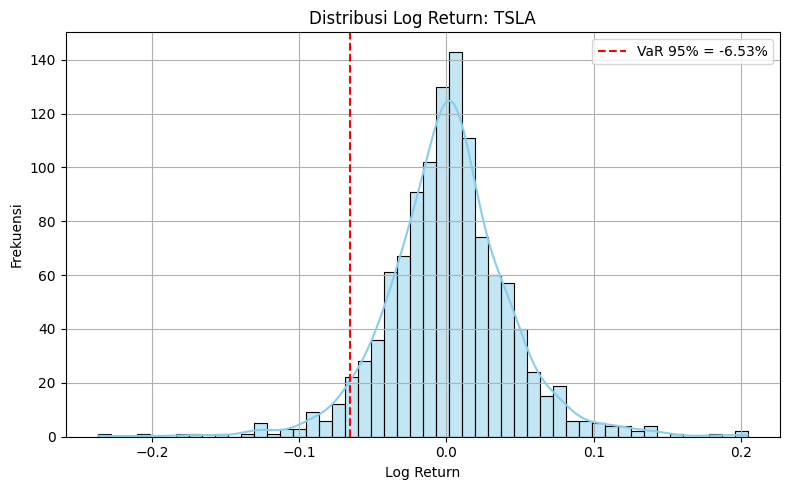

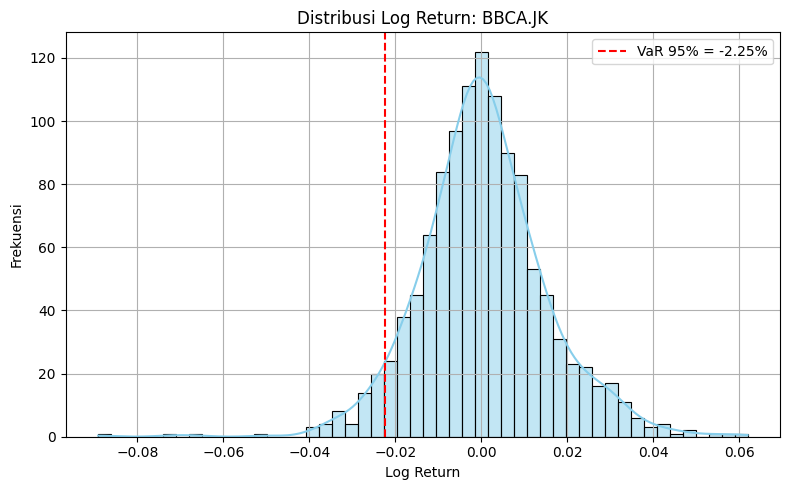

In [18]:
def plot_var_dist(ticker, returns, var_value):
    plt.figure(figsize=(8, 5))
    sns.histplot(returns, bins=50, kde=True, color='skyblue')
    plt.axvline(x=-var_value, color='red', linestyle='--', label=f'VaR 95% = {-var_value:.2%}')
    plt.title(f'Distribusi Log Return: {ticker}')
    plt.xlabel('Log Return')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Use previous historical data
plot_var_dist('TSLA', log_returns['TSLA'], abs(var_df.loc['TSLA', 'Historical VaR (95%)']))
plot_var_dist('BBCA.JK', log_returns['BBCA.JK'], abs(var_df.loc['BBCA.JK', 'Historical VaR (95%)']))


These charts display the distribution of daily log returns for TSLA and BBCA over a five-year period. Each histogram shows how frequently different return levels occurred, and they give a clear sense of each stock’s volatility and risk profile. The red dashed vertical line marks the 95% Historical Value at Risk (VaR) — meaning the return that sits at the 5th percentile of the distribution. In other words, there's only a 5% chance that the daily return will fall to the left of that line, or in simpler terms, "the worst expected loss on a normal day."

Mathematically, this can be expressed as:

$$
\text{VaR}_\alpha = q_\alpha(R)
$$

Where:
- $q_\alpha(R)$ is the α-quantile (5%) of the return distribution \( R \)

TSLA:
* The VaR threshold is around -6.53%, meaning there's a 5% chance that Tesla’s daily return could drop more than 6.53%.

* The distribution is noticeably wider and more spread out, with fatter tails shows that Tesla experiences more extreme return swings, both positive and negative.

* This reflects Tesla’s high-risk, high-volatility nature as a growth stock, especially in a sector like tech/EV that’s sensitive to sentiment and macro news.

BBCA:
* The VaR cutoff is about -2.25%, much tighter than Tesla's.

* The histogram is more concentrated around the mean, and the curve is steeper, indicating less volatility in BBCA’s price behavior.

* This makes sense given BBCA’s profile as a large-cap banking stock in a relatively stable market like Indonesia.

💡 Key Takeaway:

Even though both assets can be risky under certain conditions, TSLA exhibits much higher daily downside risk compared to BBCA. These VaR thresholds help investors understand not just the average return, but how bad a “bad day” might realistically look — which is crucial for managing portfolio risk in volatile markets.



# CAPM

In [19]:
import statsmodels.api as sm

rf_rate_us = 0.0435 / 252   # daily risk-free rate AS
rf_rate_id = 0.0660 / 252  # daily risk-free rate Indonesia

# === CAPM Function for each stock ===
def capm_analysis(stock_returns, market_returns, rf_daily):
    # Excess return
    excess_stock = stock_returns - rf_daily
    excess_market = market_returns - rf_daily

    # Regress
    X = sm.add_constant(excess_market)
    model = sm.OLS(excess_stock, X).fit()

    beta = model.params[1]
    alpha = model.params[0]

    # Expected return CAPM
    market_premium = excess_market.mean()
    expected_return = rf_daily + beta * market_premium

    # Realized mean return
    actual_return = stock_returns.mean()

    return {
        'Alpha': alpha,
        'Beta': beta,
        'Expected Return (CAPM)': expected_return,
        'Actual Mean Return': actual_return
    }

# Calculate CAPM for TSLA vs S&P 500
result_tsla = capm_analysis(
    log_returns['TSLA'],
    log_returns['^GSPC'],
    rf_rate_us
)

# Calculate CAPM for BBCA vs IHSG
result_bbca = capm_analysis(
    log_returns['BBCA.JK'],
    log_returns['^JKSE'],
    rf_rate_id
)

capm_df = pd.DataFrame({
    'TSLA': result_tsla,
    'BBCA.JK': result_bbca
})
print("CAPM Analysis Result:\n")
print(capm_df)


📈 Hasil Analisis CAPM:

                            TSLA   BBCA.JK
Alpha                   0.000211  0.000156
Beta                    2.052647  1.011219
Expected Return (CAPM)  0.001037  0.000296
Actual Mean Return      0.001249  0.000452


/tmp/ipython-input-19-1973358760.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-19-1973358760.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/tmp/ipython-input-19-1973358760.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-19-1973358760.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

The Capital Asset Pricing Model (CAPM) is a fundamental tool in finance to estimate the **expected return of an asset**, based on its relationship with the overall market. It breaks down return into two components: compensation for the time value of money (risk-free rate) and compensation for risk (market premium scaled by beta).

Mathematically, it's represented as:

$$
E(R_i) = R_f + (\beta_i \cdot (E(R_m) - R_f)
$$

Where:
- \( E(R_i) \): Expected return of the asset  
- \( R_f \): Risk-free rate (daily, from 10Y bond yield)  
- \( \beta_i \): Sensitivity of the asset to market movement  
- \( E(R_m) \): Expected return of the market

---

Interpretation of Results

| Metric | TSLA | BBCA.JK |
|--------|------|---------|
| Alpha | 0.000211 | 0.000156 |
| Beta | 2.05 | 1.01 |
| Expected Return (CAPM) | 0.001037 (0.10%) | 0.000296 (0.03%) |
| Actual Mean Return | 0.001249 (0.12%) | 0.000452 (0.05%) |

TSLA vs. S&P 500
- Beta ≈ 2.05 → TSLA is highly sensitive to market movements. If the S&P 500 moves 1%, TSLA tends to move 2.05%. Since its beta is significantly greater than 1, this indicates that TSLA is **more volatile** than the market — offering higher potential returns but also higher risk. It's typical for high-growth, sentiment-driven stocks like Tesla.
- Alpha ≈ 0.00021 → A small positive alpha suggests TSLA has slightly outperformed what CAPM predicted based on its risk profile.
- Expected return (CAPM) is about **0.10% per day**, while **actual mean return** is higher at **0.12%**, potentially reflecting some form of excess return or market inefficiency.

BBCA vs. IHSG
- Beta ≈ 1.01 → BBCA's beta is very close to 1, meaning it moves almost in sync with the overall market (IHSG). A beta of ~1 usually indicates a **market-neutral** position, meaning the stock tends to track the benchmark index.
- Alpha ≈ 0.000156 → BBCA also shows a slight positive alpha, indicating a small historical outperformance beyond what CAPM would expect.
- Expected return (CAPM) is about **0.03% per day**, while the **actual return** is **0.05%**, suggesting some added value in holding BBCA beyond pure market exposure.


---

Key Insights:
CAPM gives a clean framework to understand **systematic risk**. A higher beta means more exposure to market-wide shocks, like in TSLA’s case. Meanwhile, the small positive alpha values suggest both stocks slightly overperformed based on their risk profile. But as always, **historical performance ≠ guarantee of future results** — this is just one lens among many to assess return vs. risk.


source:
1. https://ycharts.com/indicators/10_year_treasury_rate (US)
2. https://tradingeconomics.com/indonesia/government-bond-yield (Indonesia)

/tmp/ipython-input-20-533928510.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-20-533928510.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


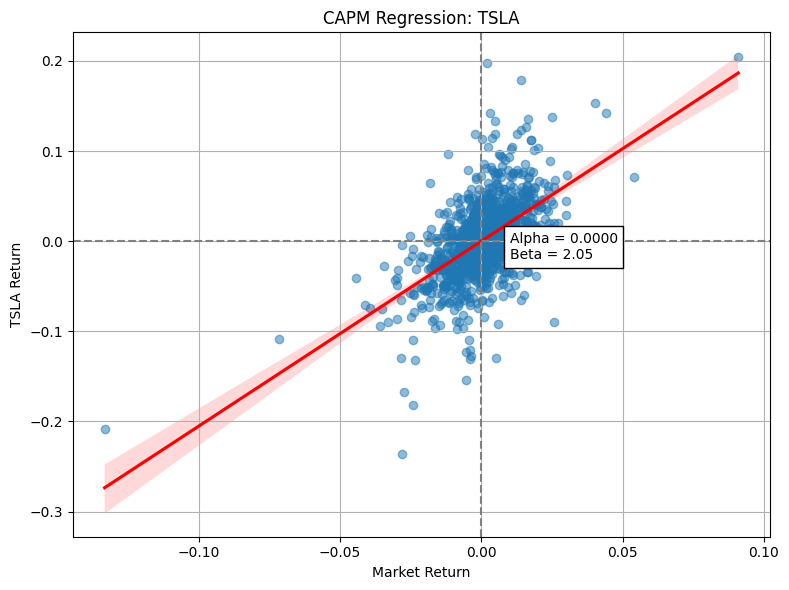

/tmp/ipython-input-20-533928510.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-20-533928510.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


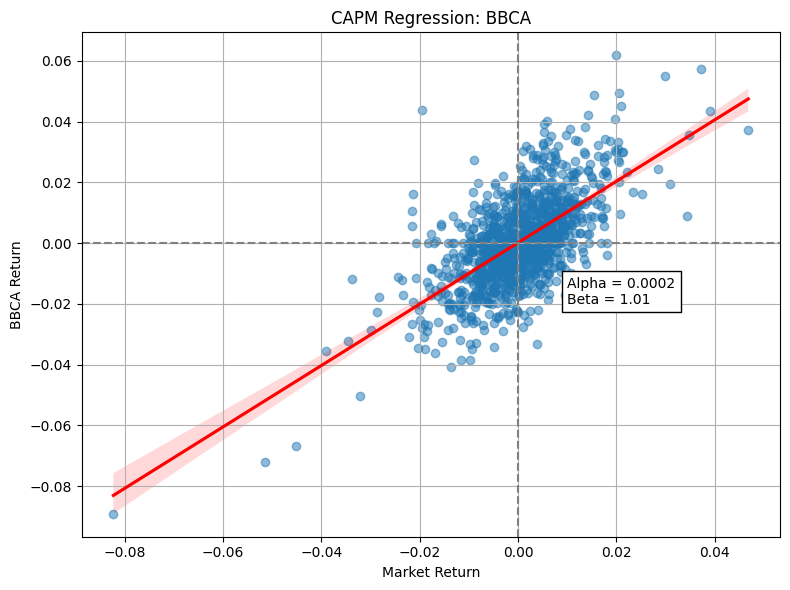

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_capm(stock_return, market_return, ticker):
    # Initiate Linear Regression
    X = sm.add_constant(market_return)
    model = sm.OLS(stock_return, X).fit()
    beta = model.params[1]
    alpha = model.params[0]

    plt.figure(figsize=(8, 6))
    sns.regplot(x=market_return, y=stock_return, line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
    plt.title(f'CAPM Regression: {ticker}')
    plt.xlabel('Market Return')
    plt.ylabel(f'{ticker} Return')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.text(0.01, -0.02, f'Alpha = {alpha:.4f}\nBeta = {beta:.2f}', fontsize=10, bbox=dict(facecolor='white'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# TSLA vs S&P 500
plot_capm(log_returns['TSLA'], log_returns['^GSPC'], 'TSLA')

# BBCA vs IHSG
plot_capm(log_returns['BBCA.JK'], log_returns['^JKSE'], 'BBCA')


CAPM Regression Plots

These regression plots visualize the relationship between each stock's daily return and the market return, based on the Capital Asset Pricing Model (CAPM). The red line represents the best linear fit, while the slope of that line is the **beta** coefficient, and the intercept is the **alpha**.

TSLA vs. S&P 500

The TSLA plot shows a strong positive linear relationship between Tesla’s returns and the S&P 500. The regression line has:
- Beta ≈ 2.05, meaning TSLA tends to amplify market movements—if the market rises 1%, TSLA could rise around 2.05%. This aligns with TSLA being a high-volatility growth stock.
- Alpha ≈ 0.0000, which indicates TSLA’s performance is roughly in line with the return predicted by CAPM. It's not far off from theoretical expectations.

BBCA vs. IHSG

The BBCA regression shows a more stable and tighter distribution around the line:
- Beta ≈ 1.01, suggesting BBCA tracks the Indonesian market (IHSG) quite closely—it's essentially a market-matching asset.
- Alpha ≈ 0.0002, indicating BBCA slightly outperformed what CAPM would expect based on its market exposure.

These visuals help us confirm the CAPM output and better understand how each asset behaves relative to its respective benchmark.


# Sharpe Ratio

In [21]:
sharpe_tsla = (log_returns['TSLA'].mean() - rf_rate_us) / log_returns['TSLA'].std()
sharpe_bbca = (log_returns['BBCA.JK'].mean() - rf_rate_id) / log_returns['BBCA.JK'].std()

print(f"Sharpe Ratio TSLA: {sharpe_tsla:.4f}")
print(f"Sharpe Ratio BBCA: {sharpe_bbca:.4f}")


Sharpe Ratio TSLA: 0.0253
Sharpe Ratio BBCA: 0.0128


Sharpe Ratio Analysis

The **Sharpe Ratio** is a widely-used metric to evaluate an asset's **risk-adjusted return**. It tells us how much excess return we’re getting per unit of volatility. The formula is:

$$
[
\text{Sharpe Ratio} = \frac{E[R_i] - R_f}{\sigma_i}
]
$$

Where:
- $(E[R_i])$ = average return of the asset (daily mean return)
- $(R_f)$ = daily risk-free rate
- $(\sigma_i)$ = standard deviation of the asset’s return (i.e., its volatility)

TSLA
- Sharpe Ratio ≈ 0.0253
- This means Tesla only delivers around **2.5% excess return per 1 unit of risk**, on a daily scale.
- It's relatively low, suggesting that despite its strong return, Tesla's volatility eats up most of the benefit. High returns, but equally high turbulence.

BBCA
- Sharpe Ratio ≈ 0.0128
- BBCA also offers a **positive but modest risk-adjusted return**, at just over **1.2% excess return per unit of risk**.
- This aligns with BBCA's lower volatility profile but also lower return expectations.

While both are positive, the low Sharpe ratios reflect that neither asset, in this period, provided particularly attractive returns relative to their risks. For comparison, a daily Sharpe above ~0.05 (or ~1 annually) would generally be more compelling.


# Summary

In [22]:
summary_df = pd.DataFrame({
    'Beta': [capm_df.loc['Beta', 'TSLA'], capm_df.loc['Beta', 'BBCA.JK']],
    'Alpha': [capm_df.loc['Alpha', 'TSLA'], capm_df.loc['Alpha', 'BBCA.JK']],
    'Expected Return (CAPM)': [capm_df.loc['Expected Return (CAPM)', 'TSLA'], capm_df.loc['Expected Return (CAPM)', 'BBCA.JK']],
    'Actual Return': [capm_df.loc['Actual Mean Return', 'TSLA'], capm_df.loc['Actual Mean Return', 'BBCA.JK']],
    'Sharpe Ratio': [sharpe_tsla, sharpe_bbca],
    'VaR Parametric (95%)': [var_df.loc['TSLA', 'Parametric VaR (95%)'], var_df.loc['BBCA.JK', 'Parametric VaR (95%)']],
    'VaR Historical (95%)': [var_df.loc['TSLA', 'Historical VaR (95%)'], var_df.loc['BBCA.JK', 'Historical VaR (95%)']]
}, index=['TSLA', 'BBCA.JK'])

summary_df


,Beta,Alpha,Expected Return (CAPM),Actual Return,Sharpe Ratio,VaR Parametric (95%),VaR Historical (95%)
TSLA,2.052647,0.000211,0.001037,0.001249,0.025310,0.068673,-0.065339
BBCA.JK,1.011219,0.000156,0.000296,0.000452,0.012846,0.023920,-0.022547


| Metric                    | TSLA         | BBCA.JK      |
|---------------------------|--------------|--------------|
| **Beta**                  | 2.0526       | 1.0112       |
| **Alpha**                 | 0.000211     | 0.000156     |
| **Expected Return (CAPM)**| 0.001037     | 0.000296     |
| **Actual Return**         | 0.001249     | 0.000452     |
| **Sharpe Ratio**          | 0.0253       | 0.0128       |
| **VaR Parametric (95%)**  | 0.0687       | 0.0239       |
| **VaR Historical (95%)**  | -0.0653      | -0.0225      |


Final Summary: TSLA vs BBCA.JK (2020–2025)

- **TSLA shows a much higher Beta (~2.05)**, indicating it’s very reactive to market swings. This amplifies both upside and downside risk. BBCA, with a Beta near 1.01, tends to move in sync with IHSG and represents more stable market exposure.

- **Both assets exhibit small positive Alpha**, suggesting they delivered slightly more return than what the CAPM model expected. TSLA’s alpha is ~0.00021, while BBCA’s is ~0.00016 — not huge, but a mild outperformance nonetheless.

- **Expected vs. Actual Return**: CAPM predicted TSLA would return about **0.10% per day**, but it achieved closer to **0.12%**. BBCA also beat expectations, delivering **0.045% daily** vs. the model’s **0.03%**.

- **Sharpe Ratios are relatively low** for both — TSLA (**~0.0253**) and BBCA (**~0.0128**) — suggesting that while they did generate excess return, they did so with considerable volatility. Not the most efficient risk-reward tradeoff.

- **Value at Risk (VaR 95%)**: TSLA could potentially lose **~6.8%** in a bad day (parametric), while BBCA could drop around **2.4%**. This aligns with their risk profiles — TSLA is more aggressive, BBCA more conservative.

In short, **TSLA offers higher return but comes with greater risk**, while **BBCA offers more stability with modest reward**. Your investment appetite will determine which fits better in your portfolio.
